In [1]:
import json
import dateutil
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
inputs = [
    "neural1.jsonl", 
    "neural.jsonl", 
    "ultra1.jsonl", 
    "ultra.jsonl",
    "quality1.jsonl",
    "quality.jsonl",
    "performance1.jsonl",
    "performance.jsonl",
    "large46.jsonl",
    "large48.jsonl"
]

In [3]:
START = pd.Timestamp('2023-11-07T13:41:30.000000+0000')
END = pd.Timestamp('2023-11-07T13:43:45.000000+0000')

In [4]:
truth = pd.read_json("buoy_data.jsonl")
truth['ts'] = truth['ts'].apply(lambda ts: dateutil.parser.parse(ts) - datetime.timedelta(hours=6))

In [5]:
truth100m = pd.read_json("buoy_data_100m.jsonl")
truth100m['ts'] = truth100m['ts'].apply(lambda ts: dateutil.parser.parse(ts) - datetime.timedelta(hours=6))

In [6]:
data = []
for fname in inputs:
    rows = []
    with open(fname) as f:
        lines = f.readlines()
        for line in lines:
            rowdata = json.loads(line)
            if dateutil.parser.parse(rowdata['msg']['CVFrame']['capture_timestamp']) < START:
                continue
            if dateutil.parser.parse(rowdata['msg']['CVFrame']['capture_timestamp']) > END:
                break
            if "CVFrame" in line:
                if rowdata['msg']['CVFrame']['detections'] == None:
                    continue
                for det in rowdata['msg']['CVFrame']['detections']:
                    cts = rowdata['msg']['CVFrame']['capture_timestamp']
                    rows.append({'capture_timestamp': dateutil.parser.parse(cts), 'cv_range': det['depth'], 'cv_az': det['rel_angle']})
        data.append(rows)

In [7]:
neural = pd.concat(
    [pd.DataFrame(data[0], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data[1], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
ultra = pd.concat(
    [pd.DataFrame(data[2], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data[3], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
quality = pd.concat(
    [pd.DataFrame(data[4], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data[5], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
performance = pd.concat(
    [pd.DataFrame(data[6], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data[7], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
large = pd.concat(
    [pd.DataFrame(data[7], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data[8], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)

In [8]:
inputs100m = [
    "neural_48.jsonl",
    "neural_50.jsonl",
    "ultra_48.jsonl",
    "ultra_50.jsonl",
    "quality_48.jsonl",
    "quality_50.jsonl",
    "performance_48.jsonl",
    "performance_50.jsonl",
    "large48.jsonl",
    "large50.jsonl",
    "texture48.jsonl",
    "texture50.jsonl",
    "conf100_48.jsonl",
    "conf100_50.jsonl",
    "1280_48.jsonl",
    "1280_50.jsonl"
]

START_100 = pd.Timestamp('2023-11-07T13:49:00.000000+0000')
END_100 = pd.Timestamp('2023-11-07T13:51:00.000000+0000')

In [9]:
data100m = []
for fname in inputs100m:
    rows = []
    with open(fname) as f:
        lines = f.readlines()
        for line in lines:
            rowdata = json.loads(line)
            if dateutil.parser.parse(rowdata['msg']['CVFrame']['capture_timestamp']) < START_100:
                continue
            if dateutil.parser.parse(rowdata['msg']['CVFrame']['capture_timestamp']) > END_100:
                break
            if "CVFrame" in line:
                if rowdata['msg']['CVFrame']['detections'] == None:
                    continue
                for det in rowdata['msg']['CVFrame']['detections']:
                    cts = rowdata['msg']['CVFrame']['capture_timestamp']
                    rows.append({'capture_timestamp': dateutil.parser.parse(cts), 'cv_range': det['depth'], 'cv_az': det['rel_angle']})
        data100m.append(rows)

In [10]:
neural100m = pd.concat(
    [pd.DataFrame(data100m[0], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data100m[1], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
ultra100m = pd.concat(
    [pd.DataFrame(data100m[2], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data100m[3], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
quality100m = pd.concat(
    [pd.DataFrame(data100m[4], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data100m[5], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
performance100m = pd.concat(
    [pd.DataFrame(data100m[6], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data100m[7], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
large100m = pd.concat(
    [pd.DataFrame(data100m[8], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data100m[9], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
texture50_100m = pd.concat(
    [pd.DataFrame(data100m[10], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data100m[11], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
conf100_100m = pd.concat(
    [pd.DataFrame(data100m[12], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data100m[13], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)
highres_100m = pd.concat(
    [pd.DataFrame(data100m[14], columns=['capture_timestamp', 'cv_range', 'cv_az']),
    pd.DataFrame(data100m[15], columns=['capture_timestamp', 'cv_range', 'cv_az'])]
)

<Axes: xlabel='capture_timestamp', ylabel='cv_az'>

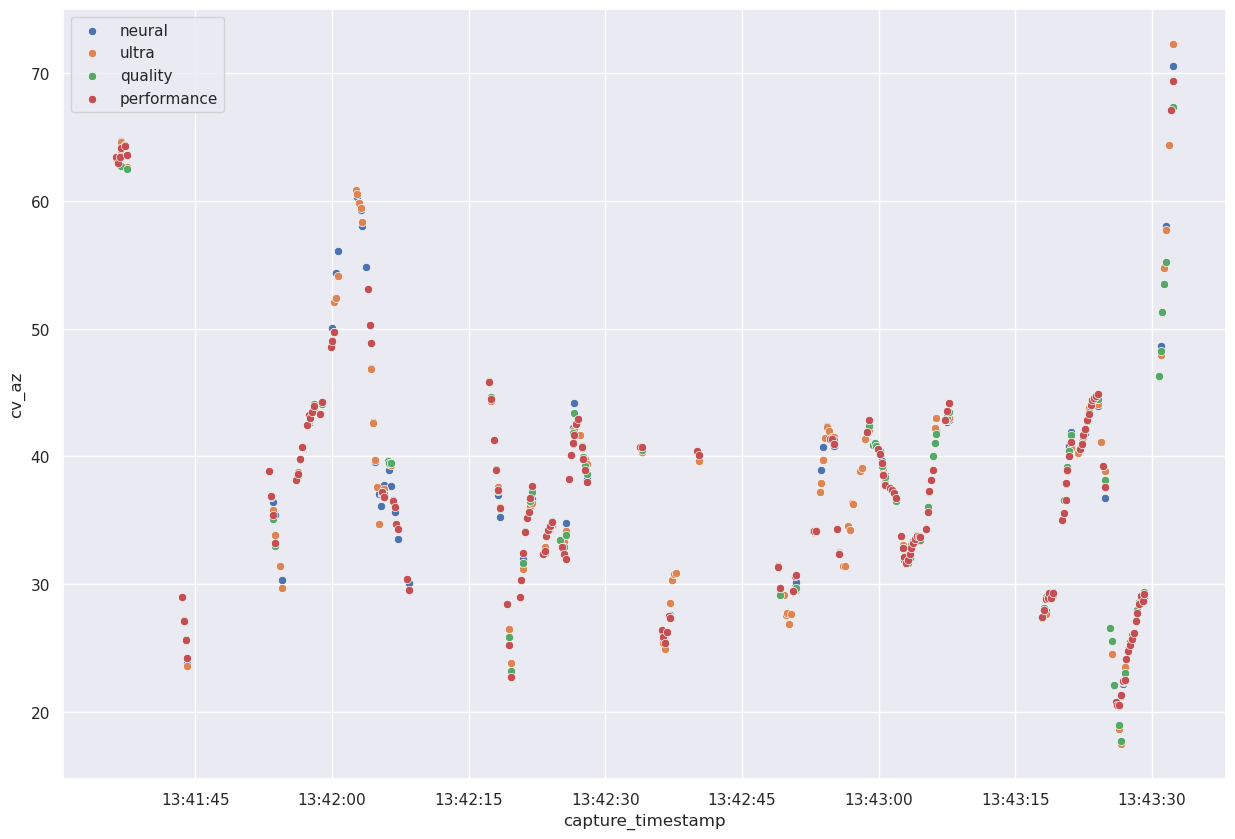

In [11]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=neural, x="capture_timestamp", y="cv_az", label="neural")
sns.scatterplot(data=ultra, x="capture_timestamp", y="cv_az", label="ultra")
sns.scatterplot(data=quality, x="capture_timestamp", y="cv_az", label="quality")
sns.scatterplot(data=performance, x="capture_timestamp", y="cv_az", label="performance")

<Axes: xlabel='ts', ylabel='buoy_r'>

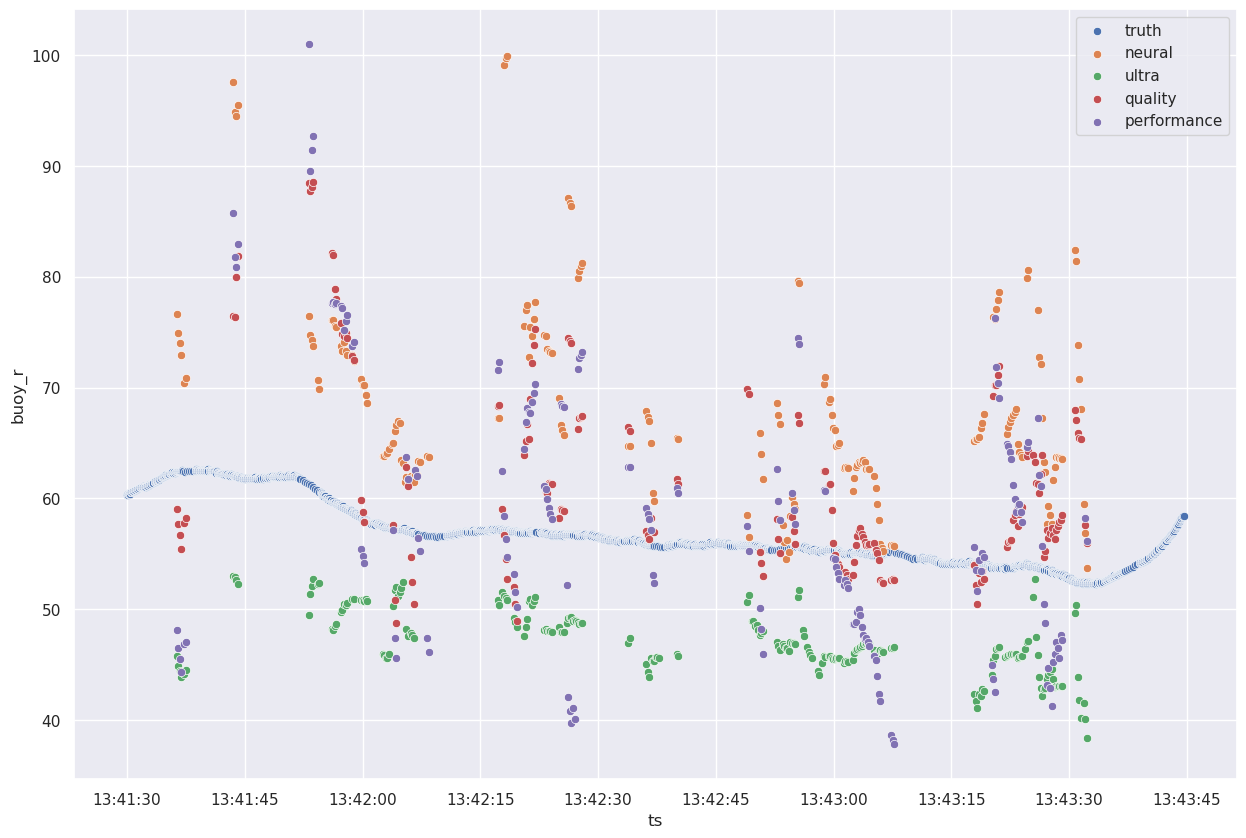

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=truth, x='ts', y='buoy_r', label='truth')
sns.scatterplot(data=neural, x="capture_timestamp", y="cv_range", label="neural")
sns.scatterplot(data=ultra, x="capture_timestamp", y="cv_range", label="ultra")
sns.scatterplot(data=quality, x="capture_timestamp", y="cv_range", label="quality")
sns.scatterplot(data=performance, x="capture_timestamp", y="cv_range", label="performance")

<Axes: xlabel='ts', ylabel='buoy_r'>

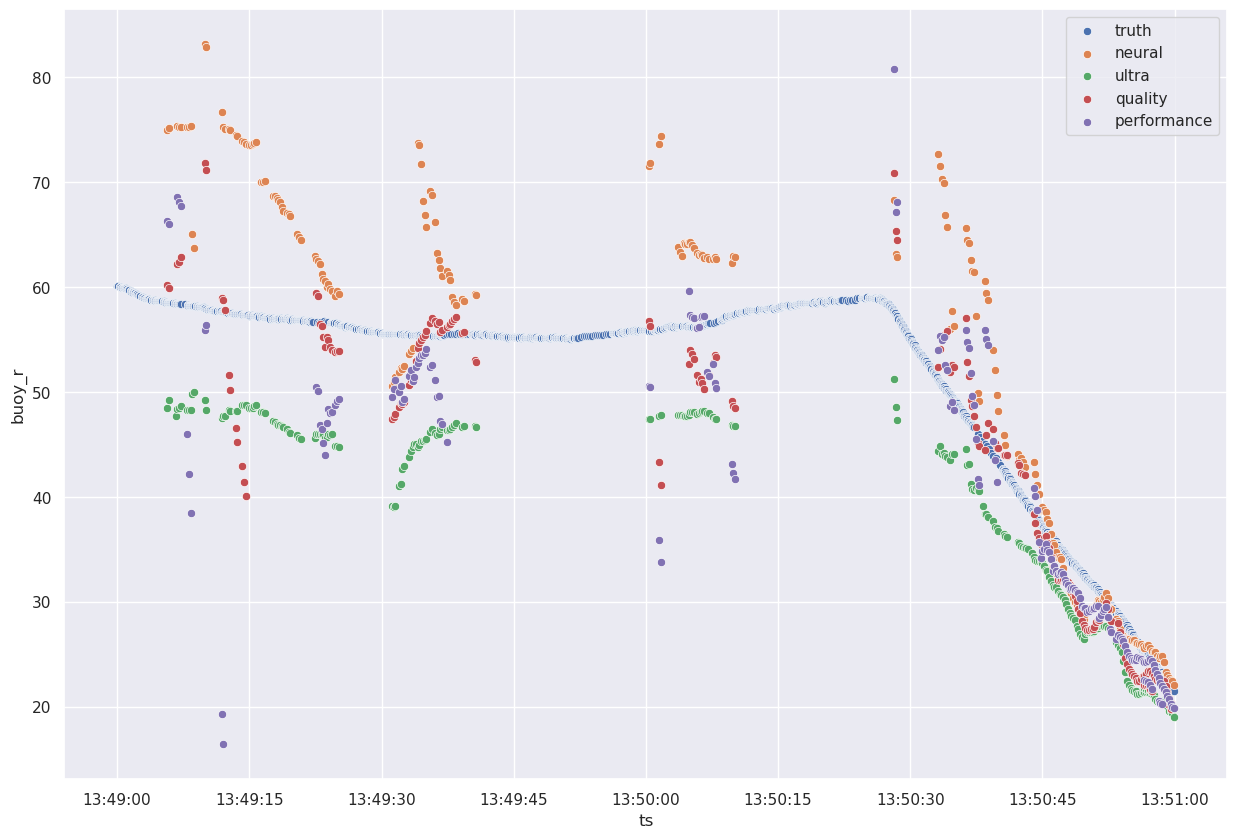

In [13]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=truth100m, x='ts', y='buoy_r', label='truth')
sns.scatterplot(data=neural100m, x="capture_timestamp", y="cv_range", label="neural")
sns.scatterplot(data=ultra100m, x="capture_timestamp", y="cv_range", label="ultra")
sns.scatterplot(data=quality100m, x="capture_timestamp", y="cv_range", label="quality")
sns.scatterplot(data=performance100m, x="capture_timestamp", y="cv_range", label="performance")

<Axes: xlabel='ts', ylabel='buoy_r'>

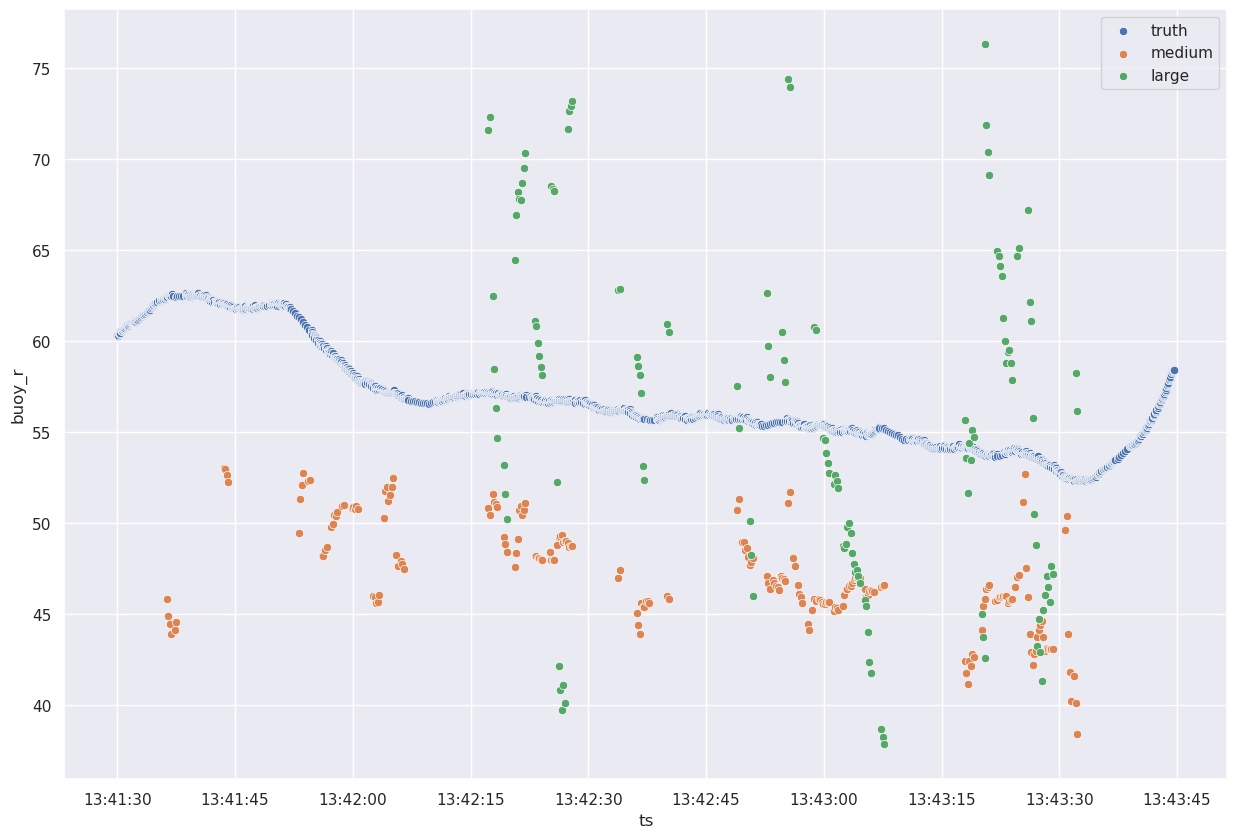

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=truth, x='ts', y='buoy_r', label='truth')
sns.scatterplot(data=ultra, x="capture_timestamp", y="cv_range", label="medium")
sns.scatterplot(data=large, x="capture_timestamp", y="cv_range", label="large")

<Axes: xlabel='ts', ylabel='buoy_r'>

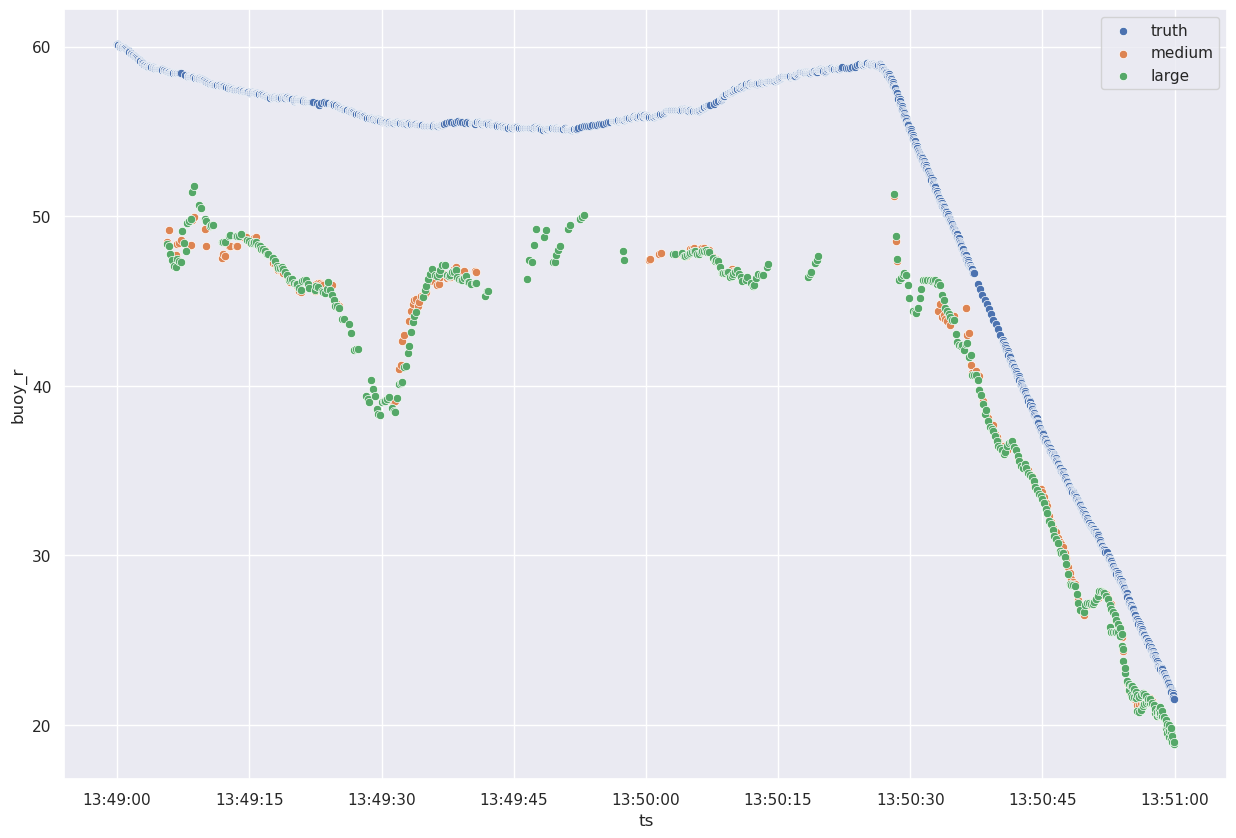

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=truth100m, x='ts', y='buoy_r', label='truth')
sns.scatterplot(data=ultra100m, x="capture_timestamp", y="cv_range", label="medium")
sns.scatterplot(data=large100m, x="capture_timestamp", y="cv_range", label="large")

<Axes: xlabel='ts', ylabel='buoy_r'>

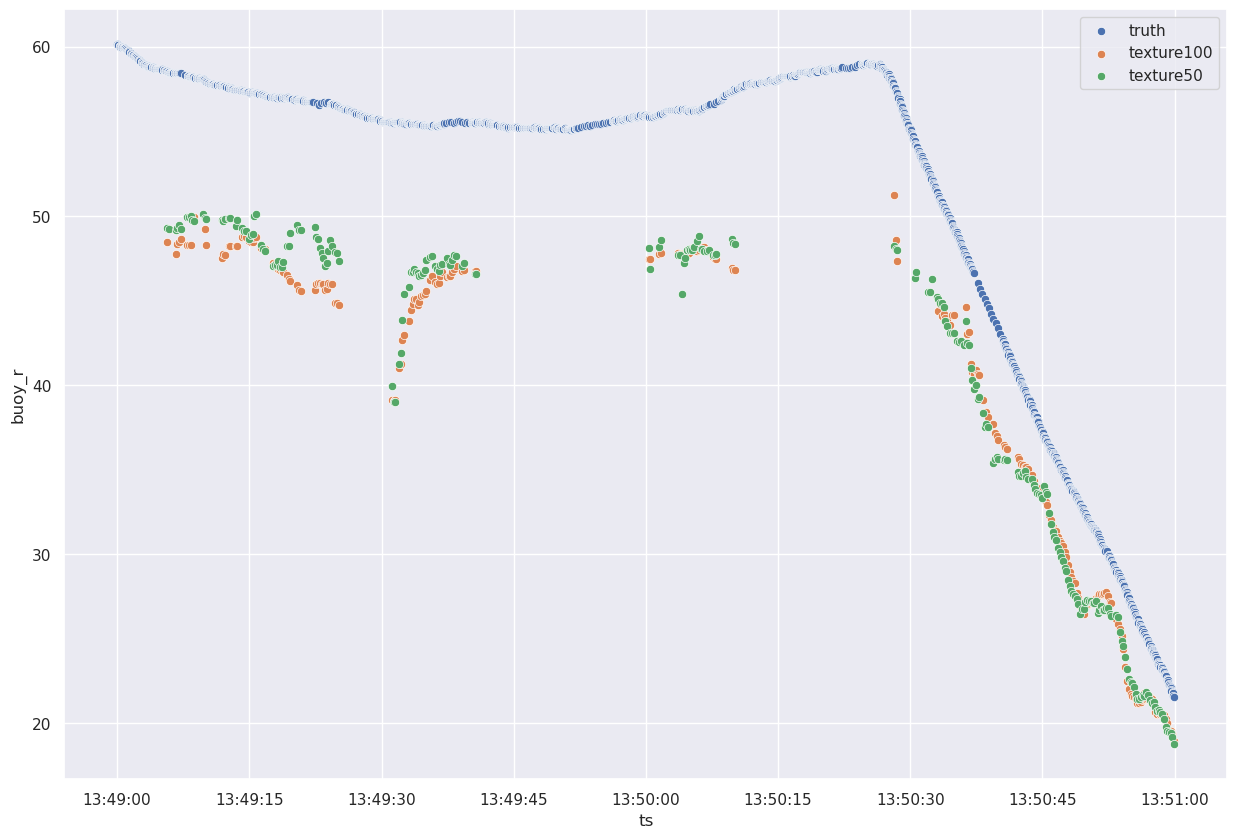

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=truth100m, x='ts', y='buoy_r', label='truth')
sns.scatterplot(data=ultra100m, x="capture_timestamp", y="cv_range", label="texture100")
sns.scatterplot(data=texture50_100m, x="capture_timestamp", y="cv_range", label="texture50")

<Axes: xlabel='ts', ylabel='buoy_r'>

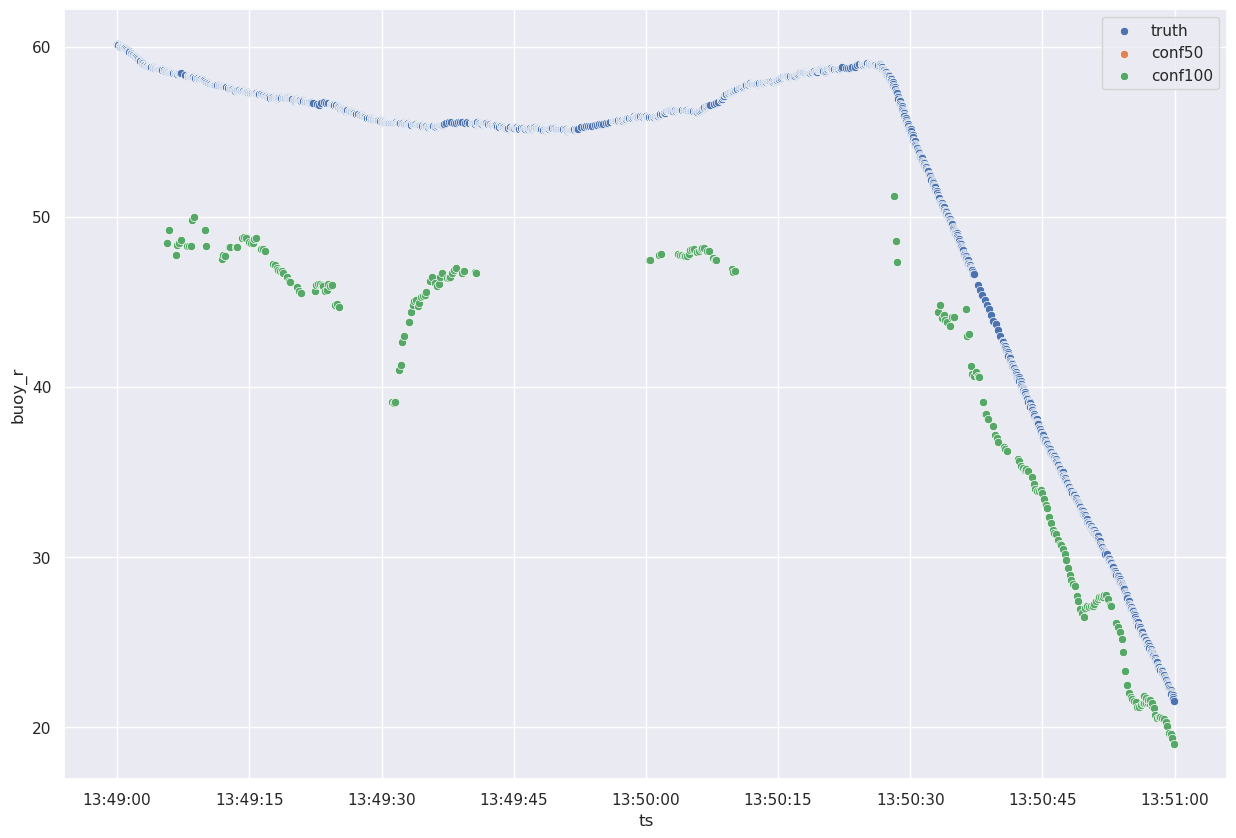

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=truth100m, x='ts', y='buoy_r', label='truth')
sns.scatterplot(data=ultra100m, x="capture_timestamp", y="cv_range", label="conf50")
sns.scatterplot(data=conf100_100m, x="capture_timestamp", y="cv_range", label="conf100")

<Axes: xlabel='ts', ylabel='buoy_r'>

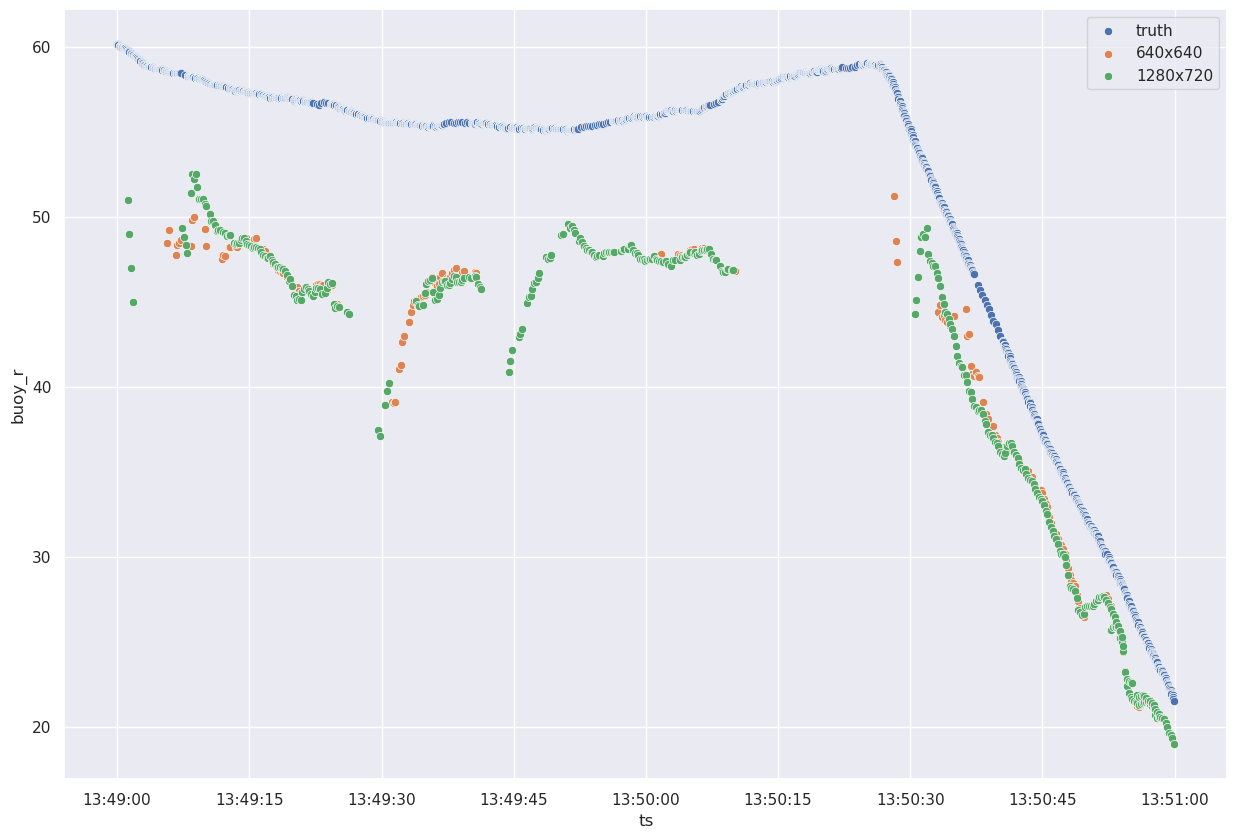

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=truth100m, x='ts', y='buoy_r', label='truth')
sns.scatterplot(data=ultra100m, x="capture_timestamp", y="cv_range", label="640x640")
sns.scatterplot(data=highres_100m, x="capture_timestamp", y="cv_range", label="1280x720")